In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10, 6

In [2]:
data = pd.read_csv('Final.csv')
data.head(10)

,Patient_ID,PerformedDate,Name_calc,Albumin/Creatinine_Res,Lipids_Res,a1c_Res,BP_res,A1C_RF,BP_RF,Lip_RF,Alb_RF,Total_RF
0,1.000100e+12,2017-11-02,Urine Albumin/Creatinine Ratio (ACR),392.0,NaN,NaN,NaN,0,0.0,0.0,3,3.0
1,1.000100e+12,2017-10-16,Urine Albumin/Creatinine Ratio (ACR),221.0,NaN,NaN,NaN,0,0.0,0.0,3,3.0
2,1.000100e+12,2014-04-07,Urine Albumin/Creatinine Ratio (ACR),9.0,NaN,NaN,NaN,0,0.0,0.0,2,2.0
3,1.000100e+12,2014-03-07,Urine Albumin/Creatinine Ratio (ACR),8.0,NaN,NaN,NaN,0,0.0,0.0,2,2.0
4,1.000100e+12,2014-02-05,Urine Albumin/Creatinine Ratio (ACR),9.0,NaN,NaN,NaN,0,0.0,0.0,2,2.0
5,1.000100e+12,2014-01-17,Urine Albumin/Creatinine Ratio (ACR),61.0,NaN,NaN,NaN,0,0.0,0.0,3,3.0
6,1.000100e+12,2019-04-07,Urine Albumin/Creatinine Ratio (ACR),197.0,NaN,NaN,NaN,0,0.0,0.0,3,3.0
7,1.000100e+12,2019-03-13,Urine Albumin/Creatinine Ratio (ACR),163.0,NaN,NaN,NaN,0,0.0,0.0,3,3.0
8,1.000100e+12,2015-09-01,Urine Albumin/Creatinine Ratio (ACR),7.0,NaN,NaN,NaN,0,0.0,0.0,2,2.0
9,1.000100e+12,2015-07-13,Urine Albumin/Creatinine Ratio (ACR),3.0,NaN,NaN,NaN,0,0.0,0.0,1,1.0


In [5]:
datanew = data.loc[data['Name_calc'] == 'Cholesterol in HDL (HDLc)']
datanew = datanew.drop(['Patient_ID', 'Name_calc', 'Albumin/Creatinine_Res', 'a1c_Res', 'BP_res', 'A1C_RF','BP_RF','Lip_RF','Alb_RF','Total_RF'], axis=1)
print(datanew)

        PerformedDate  Lipids_Res
1431297    2017-10-19        67.0
1431298    2016-10-14       112.0
1431299    2014-03-18       168.0
1431300    2014-01-17        98.0
1431301    2018-04-30        69.0
...               ...         ...
2410640    2017-03-24        14.0
2410641    2018-03-22       139.0
2410642    2018-08-10       123.0
2410643    2015-02-09        99.0
2410644    2017-05-12       144.0

[948130 rows x 2 columns]


In [6]:
datanew['PerformedDate'] = pd.to_datetime(datanew['PerformedDate'], infer_datetime_format=True)
indexedDataset = datanew.set_index(['PerformedDate'])
print(indexedDataset)

               Lipids_Res
PerformedDate            
2017-10-19           67.0
2016-10-14          112.0
2014-03-18          168.0
2014-01-17           98.0
2018-04-30           69.0
...                   ...
2017-03-24           14.0
2018-03-22          139.0
2018-08-10          123.0
2015-02-09           99.0
2017-05-12          144.0

[948130 rows x 1 columns]


In [7]:
from datetime import datetime

In [8]:
indexedDataset = indexedDataset.dropna()
print(indexedDataset)

               Lipids_Res
PerformedDate            
2017-10-19           67.0
2016-10-14          112.0
2014-03-18          168.0
2014-01-17           98.0
2018-04-30           69.0
...                   ...
2017-03-24           14.0
2018-03-22          139.0
2018-08-10          123.0
2015-02-09           99.0
2017-05-12          144.0

[916215 rows x 1 columns]


In [9]:
indexedDataset.index = pd.to_datetime(indexedDataset.index)
indexedDataset = indexedDataset.sort_index()
print(indexedDataset)

               Lipids_Res
PerformedDate            
1991-02-27          104.0
1993-02-02           92.0
1994-09-16           83.0
1995-09-07            7.0
1995-09-07           67.0
...                   ...
NaT                 104.0
NaT                  57.0
NaT                 134.0
NaT                 132.0
NaT                 125.0

[916215 rows x 1 columns]


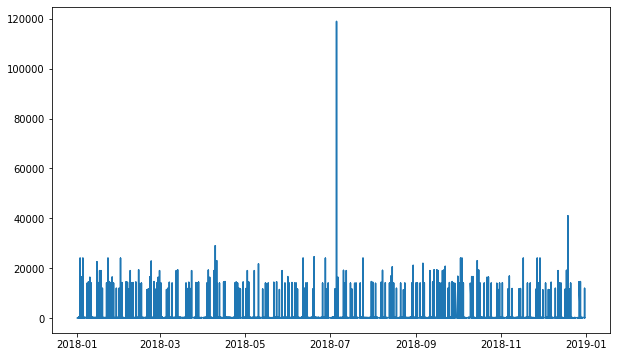

In [10]:
sub = indexedDataset['2018']
plt.plot(sub)

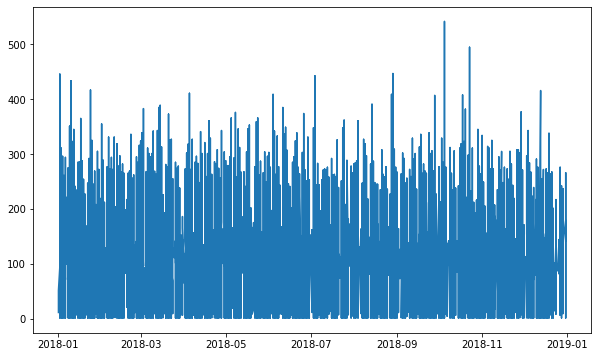

In [11]:
from scipy import stats
new = sub[(np.abs(stats.zscore(sub['Lipids_Res'])) < 3)]
new2 = new.loc[(new!=0).any(axis=1)]
plt.plot(new2)

In [12]:
#Determing rolling statistics
rolmean = new2.rolling(window=12).mean()
rolstd = new2.rolling(window=12).std()
print(rolmean, rolstd)

               Lipids_Res
PerformedDate            
2018-01-01            NaN
2018-01-01            NaN
2018-01-02            NaN
2018-01-02            NaN
2018-01-02            NaN
...                   ...
2018-12-31     108.083333
2018-12-31     109.000000
2018-12-31     110.333333
2018-12-31     108.250000
2018-12-31     114.333333

[89790 rows x 1 columns]                Lipids_Res
PerformedDate            
2018-01-01            NaN
2018-01-01            NaN
2018-01-02            NaN
2018-01-02            NaN
2018-01-02            NaN
...                   ...
2018-12-31      44.291305
2018-12-31      45.073677
2018-12-31      46.042141
2018-12-31      45.535451
2018-12-31      44.534631

[89790 rows x 1 columns]


In [13]:
indexedDataset_logScale = np.log(new2)
print(indexedDataset_logScale)

               Lipids_Res
PerformedDate            
2018-01-01       2.397895
2018-01-01       3.931826
2018-01-02       4.553877
2018-01-02       5.337538
2018-01-02       4.919981
...                   ...
2018-12-31       4.905275
2018-12-31       5.003946
2018-12-31       4.997212
2018-12-31       4.672829
2018-12-31       4.948760

[89790 rows x 1 columns]


In [14]:
movingAverage = indexedDataset_logScale.rolling(window=12).mean()
movingSTD = indexedDataset_logScale.rolling(window=12).std()
print(movingAverage, movingSTD)

               Lipids_Res
PerformedDate            
2018-01-01            NaN
2018-01-01            NaN
2018-01-02            NaN
2018-01-02            NaN
2018-01-02            NaN
...                   ...
2018-12-31       4.340737
2018-12-31       4.347128
2018-12-31       4.356662
2018-12-31       4.339164
2018-12-31       4.399935

[89790 rows x 1 columns]                Lipids_Res
PerformedDate            
2018-01-01            NaN
2018-01-01            NaN
2018-01-02            NaN
2018-01-02            NaN
2018-01-02            NaN
...                   ...
2018-12-31       1.393140
2018-12-31       1.396248
2018-12-31       1.400622
2018-12-31       1.394751
2018-12-31       1.404914

[89790 rows x 1 columns]


In [15]:
# Get the difference between the moving average and the actual number of passengers
datasetLogScaleMinusMovingAverage = indexedDataset_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)
#Remove Nan Values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,Lipids_Res
PerformedDate,
2018-01-02,0.357526
2018-01-02,-0.005410
2018-01-02,0.614649
2018-01-02,0.519019
2018-01-02,0.620920
2018-01-02,0.549101
2018-01-02,0.317477
2018-01-02,-0.059223
2018-01-02,0.287646


In [16]:
from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries['Lipids_Res'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

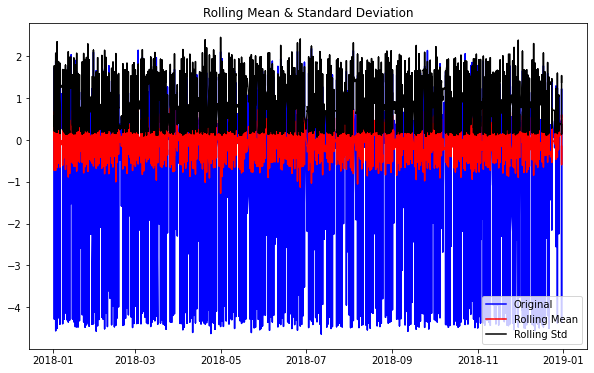

Results of Dickey-Fuller Test:
Test Statistic                   -59.918716
p-value                            0.000000
#Lags Used                        66.000000
Number of Observations Used    89712.000000
Critical Value (1%)               -3.430423
Critical Value (5%)               -2.861572
Critical Value (10%)              -2.566787
dtype: float64


In [17]:
import matplotlib as mpl
mpl.rcParams['agg.path.chunksize'] = 100000000000
test_stationarity(datasetLogScaleMinusMovingAverage)

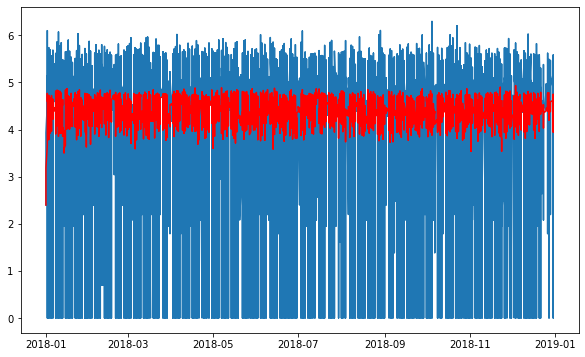

In [18]:
exponentialDecayWeightedAverage = indexedDataset_logScale.ewm(halflife=12, min_periods=0, adjust=True).mean()
plt.plot(indexedDataset_logScale)
plt.plot(exponentialDecayWeightedAverage, color='red')

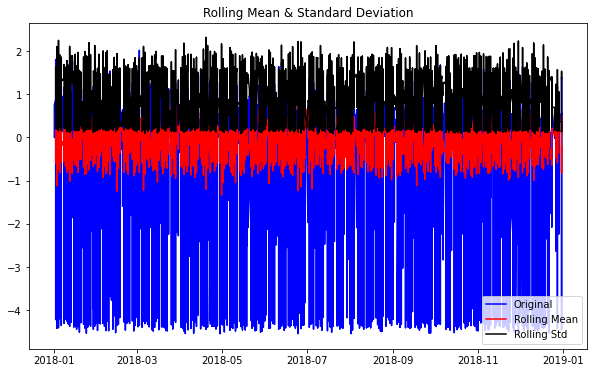

Results of Dickey-Fuller Test:
Test Statistic                   -51.866946
p-value                            0.000000
#Lags Used                        66.000000
Number of Observations Used    89723.000000
Critical Value (1%)               -3.430423
Critical Value (5%)               -2.861572
Critical Value (10%)              -2.566787
dtype: float64


In [19]:
datasetLogScaleMinusMovingExponentialDecayAverage = indexedDataset_logScale - exponentialDecayWeightedAverage
test_stationarity(datasetLogScaleMinusMovingExponentialDecayAverage)

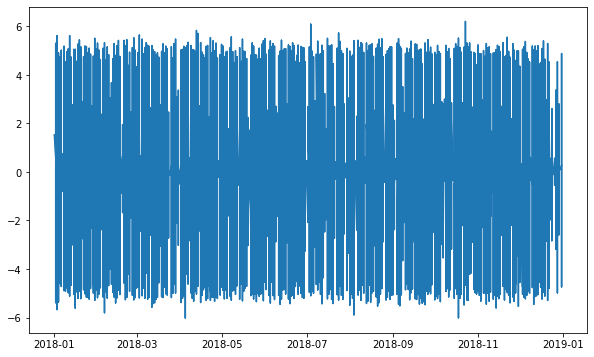

In [20]:
datasetLogDiffShifting = indexedDataset_logScale - indexedDataset_logScale.shift()
plt.plot(datasetLogDiffShifting)

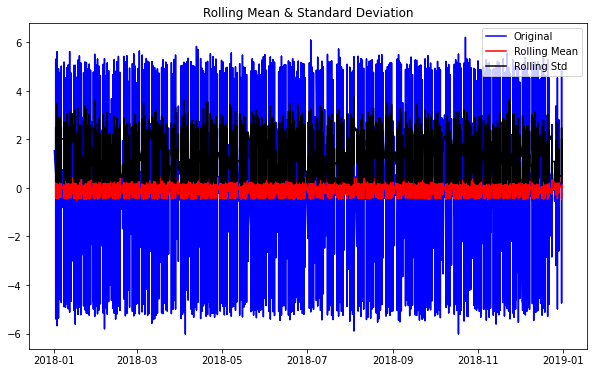

Results of Dickey-Fuller Test:
Test Statistic                   -63.359170
p-value                            0.000000
#Lags Used                        66.000000
Number of Observations Used    89722.000000
Critical Value (1%)               -3.430423
Critical Value (5%)               -2.861572
Critical Value (10%)              -2.566787
dtype: float64


In [21]:
datasetLogDiffShifting.dropna(inplace=True)
test_stationarity(datasetLogDiffShifting)

In [22]:
indexedDataset_logScale.index = pd.to_datetime(indexedDataset_logScale.index)

c:\users\susu1\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\stattools.py:667: FutureWarning: fft=True will become the default after the release of the 0.12 release of statsmodels. To suppress this warning, explicitly set fft=False.
  warnings.warn(


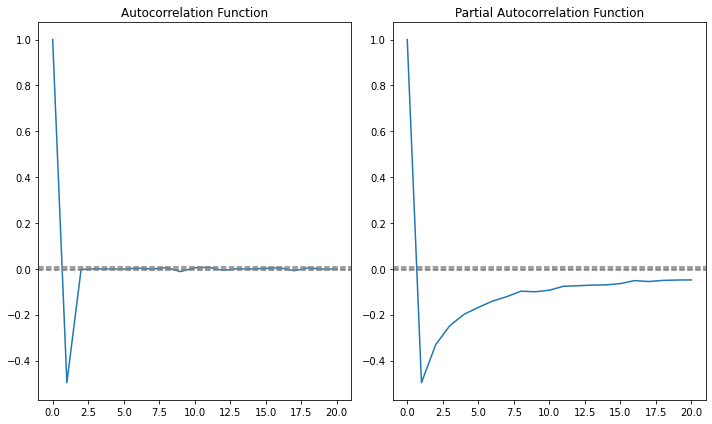

In [24]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(datasetLogDiffShifting, nlags=20)
lag_pacf = pacf(datasetLogDiffShifting, nlags=20, method='ols')


#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

c:\users\susu1\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\susu1\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Plotting AR model


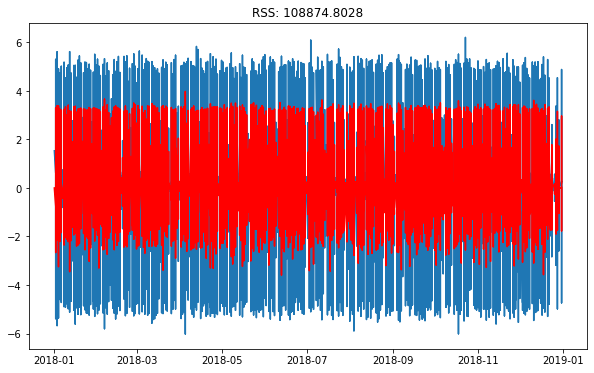

In [26]:
from statsmodels.tsa.arima_model import ARIMA

#AR MODEL
model = ARIMA(indexedDataset_logScale, order=(2, 1, 0))  
results_AR = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_AR.fittedvalues-datasetLogDiffShifting['Lipids_Res'])**2))
print('Plotting AR model')

c:\users\susu1\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\susu1\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


Plotting AR model


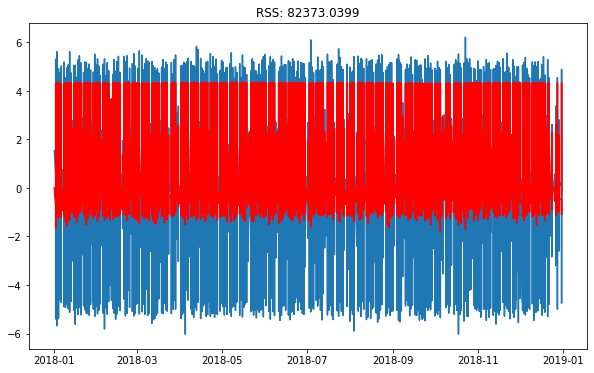

In [28]:
#MA MODEL
model = ARIMA(indexedDataset_logScale, order=(0, 1, 2))  
results_MA = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_MA.fittedvalues-datasetLogDiffShifting['Lipids_Res'])**2))
print('Plotting AR model')

In [29]:
model = ARIMA(indexedDataset_logScale, order=(2, 1, 2))  
results_ARIMA = model.fit(disp=-1)  
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color='red')
plt.title('RSS: %.4f'% sum((results_ARIMA.fittedvalues-datasetLogDiffShifting['Lipids_Res'])**2))

c:\users\susu1\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\susu1\appdata\local\programs\python\python39\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'


MemoryError: Unable to allocate 60.0 GiB for an array with shape (89723, 89723) and data type float64

In [30]:
predictions_ARIMA_diff = pd.Series(results_MA.fittedvalues, copy=True)
print (predictions_ARIMA_diff.head())

PerformedDate
2018-01-01    7.626889e-08
2018-01-02   -7.444062e-01
2018-01-02   -9.027338e-01
2018-01-02   -1.248639e+00
2018-01-02   -6.792611e-01
dtype: float64


In [31]:
#Convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print (predictions_ARIMA_diff_cumsum.head())

PerformedDate
2018-01-01    7.626889e-08
2018-01-02   -7.444061e-01
2018-01-02   -1.647140e+00
2018-01-02   -2.895779e+00
2018-01-02   -3.575040e+00
dtype: float64


In [32]:
#predictions_ARIMA_log = pd.Series(ts_log.ix[0], index=ts_log.index)
#predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
#predictions_ARIMA_log.head()

predictions_ARIMA_log = pd.Series(indexedDataset_logScale.iloc[0,0],index=indexedDataset_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum,fill_value=0)
predictions_ARIMA_log.head()

PerformedDate
2018-01-01    2.397895
2018-01-01    2.397895
2018-01-02    1.653489
2018-01-02    0.750755
2018-01-02   -0.497883
dtype: float64

MemoryError: Unable to allocate 75.2 GiB for an array with shape (10089653495,) and data type int64

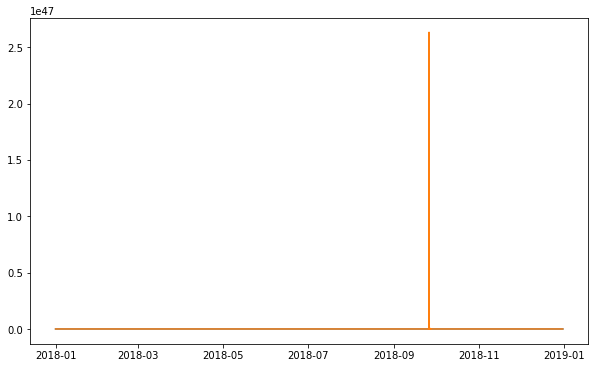

In [34]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(new2)
plt.plot(predictions_ARIMA)
plt.title('RMSE: %.4f'% np.sqrt(sum((predictions_ARIMA-indexedDataset['Lipids_Res'])**2)/len(indexedDataset['Lipids_Res'])))